In [1]:
#installation

!pip install split-folders
!pip install tensorflow
!pip install matplotlib
!pip install sklearn

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [1]:
import splitfolders
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob, random
import matplotlib.pyplot as plt

print(tf.__version__)
ROOT_DIR = os.path.abspath(os.curdir)

2.6.2


In [2]:
# split training data into two folders train and validation with ratio 80 and 20 percent.

splitfolders.ratio(ROOT_DIR+"/CSGO-gun-dataset/Train", output=ROOT_DIR+"/training-data", seed=100, ratio=(.8, .2), group_prefix=None)

In [3]:
ImageDataGenerators = tf.keras.preprocessing.image.ImageDataGenerator

TRAINING_DIR = ROOT_DIR+"/training-data/train/"
VALIDATION_DIR = ROOT_DIR+"/training-data/val/"

train_datagen = ImageDataGenerators(rescale=1.0/255.)
validation_datagen = ImageDataGenerators(rescale=1.0/255.)

In [4]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=64,
                                                    class_mode="categorical",
                                                    target_size=(150, 150))


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=64,
                                                              class_mode="categorical",
                                                              target_size=(150, 150))

Found 650 images belonging to 33 classes.
Found 177 images belonging to 33 classes.


In [5]:
class_dict = train_generator.class_indices # returns ie. {'aligator': 0, 'cat': 1, 'dog': 2}

In [6]:
class_dict

{'AK-47': 0,
 'AWP': 1,
 'Aug': 2,
 'CZ-75': 3,
 'Famas': 4,
 'Five_Seven': 5,
 'G3SG1': 6,
 'Galil-AR': 7,
 'Glock': 8,
 'M249': 9,
 'M4A1': 10,
 'M4A4': 11,
 'MAC-10': 12,
 'MP-5': 13,
 'MP-7': 14,
 'MP-9': 15,
 'Mag-7': 16,
 'Negev': 17,
 'Nova': 18,
 'P-2000': 19,
 'P-90': 20,
 'P250': 21,
 'Revolver': 22,
 'SG-553': 23,
 'Sawed-Off': 24,
 'Scar-20': 25,
 'Scout': 26,
 'Tec-9': 27,
 'UMP': 28,
 'USP': 29,
 'XM-1014': 30,
 'dual_pistol': 31,
 'pp': 32}

In [7]:
number_Class = len(class_dict)

In [8]:
number_Class

33

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(number_Class, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)       

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
11/11 [==============================] - 19s 2s/step - loss: 3.3000 - accuracy: 0.1246 - val_loss: 2.7182 - val_accuracy: 0.2486
Epoch 2/5
11/11 [==============================] - 13s 1s/step - loss: 1.8929 - accuracy: 0.5569 - val_loss: 0.7875 - val_accuracy: 0.7797
Epoch 3/5
11/11 [==============================] - 13s 1s/step - loss: 0.4181 - accuracy: 0.9092 - val_loss: 0.2163 - val_accuracy: 0.9435
Epoch 4/5
11/11 [==============================] - 13s 1s/step - loss: 0.0870 - accuracy: 0.9831 - val_loss: 0.0328 - val_accuracy: 0.9831
Epoch 5/5
11/11 [==============================] - 12s 1s/step - loss: 0.0670 - accuracy: 0.9877 - val_loss: 0.0192 - val_accuracy: 0.9944


In [19]:
model.save('Gun-Classification.h5')

Text(0.5, 1.0, 'Training and validation loss')

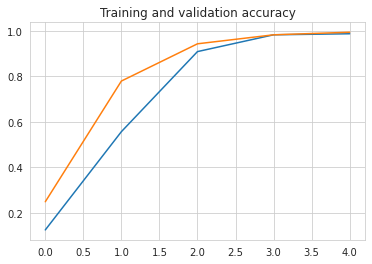

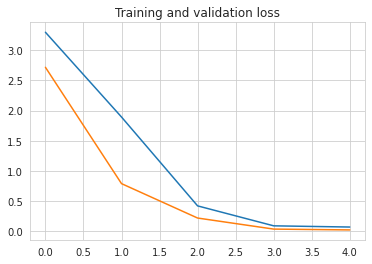

In [20]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

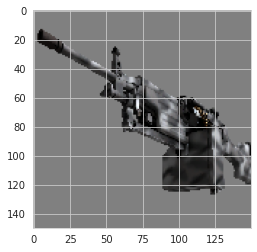

M249


In [21]:
#Predictions
# Execute Predictions cell every time, Random image pass to the model

image = keras.preprocessing.image
model = keras.models.load_model('Gun-Classification.h5')

#path to any image to be predicted
TestImage = glob.glob(ROOT_DIR+"/CSGO-gun-dataset/Test/*/*")
images = glob.glob(random.choice(TestImage))
random_image = random.choice(images)

img = image.load_img(random_image, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
y_classes = classes.argmax(axis=-1)

name = list(class_dict.keys())[list(class_dict.values()).index(y_classes[0])]
imgplot = plt.imshow(img)
plt.show()
print(name)